In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据集
data_df = pd.read_csv("archive/creditcard.csv")
print(data_df.shape)
data_df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#将特征Time（单为秒）转化为以小时为单位
data_df['Hour'] = data_df['Time'].apply(lambda x:divmod(x,3600)[0])
data_df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
262880,160691.0,-0.554245,0.729329,0.948531,-0.383419,-0.192629,-0.004870,-0.102578,0.466519,0.113783,...,0.975551,-0.256731,-0.565464,-0.330925,0.698894,0.026431,0.092905,14.90,0,44.0
239933,150346.0,-0.609728,0.854123,-0.670289,-0.180870,3.647699,3.651635,0.718189,0.822284,-1.199207,...,0.157626,-0.556241,0.724055,1.165441,-0.167282,0.055601,0.046570,2.85,0,41.0
30991,36167.0,1.218761,-0.937347,0.887892,-0.625458,-1.439829,-0.254052,-1.070219,0.096453,-0.309718,...,1.087391,-0.115845,0.115133,0.311072,-0.024023,0.038771,0.031243,69.99,0,10.0
99594,67191.0,1.200607,-0.096282,0.675350,0.962870,-0.074779,1.084174,-0.631007,0.292135,0.913416,...,-0.081177,-0.156975,-1.304954,0.543106,-0.294708,0.089353,0.022446,13.53,0,18.0
271515,164605.0,-0.018180,1.314452,2.227606,4.464241,0.200709,0.997620,0.239625,-0.100197,-1.425324,...,1.305740,-0.209927,0.043281,-0.746736,0.442239,-0.033346,-0.009634,6.06,0,45.0


In [5]:
# 导入seaborn绘图库
import seaborn as sns

# 统计正负样本的数量
data_df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

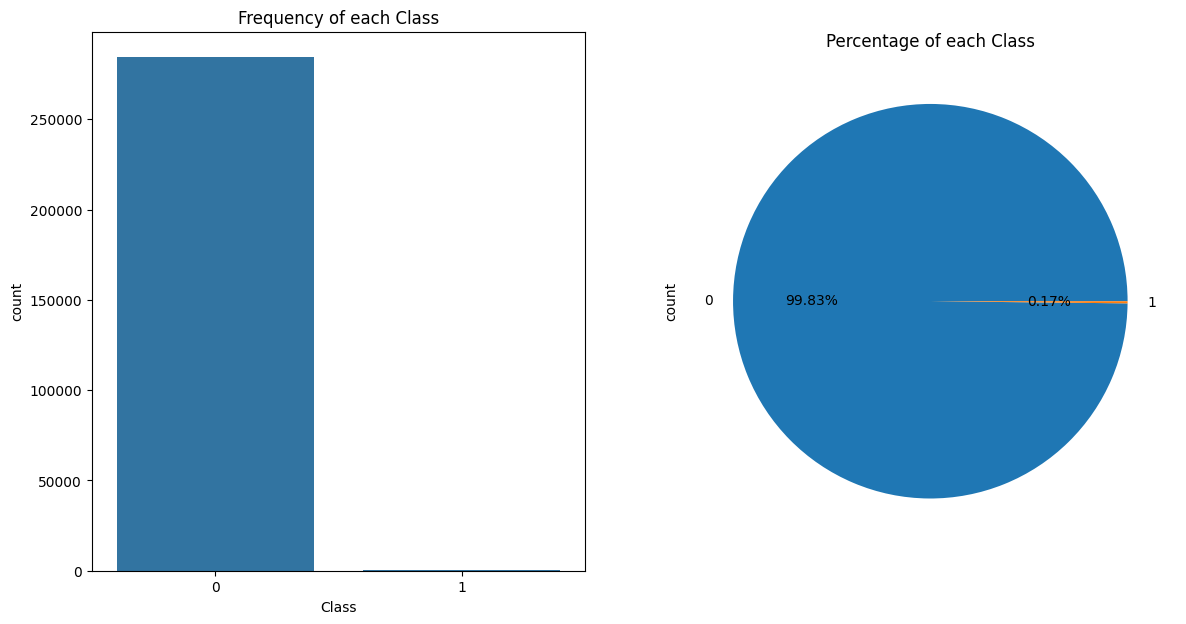

In [18]:
# 目标变量分布可视化
fig, axs = plt.subplots(1,2,figsize=(14,7))
## 柱状图
sns.countplot(x='Class',data=data_df,ax=axs[0])
axs[0].set_title("Frequency of each Class")

## 饼图
data_df['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

正负样本严重不平衡

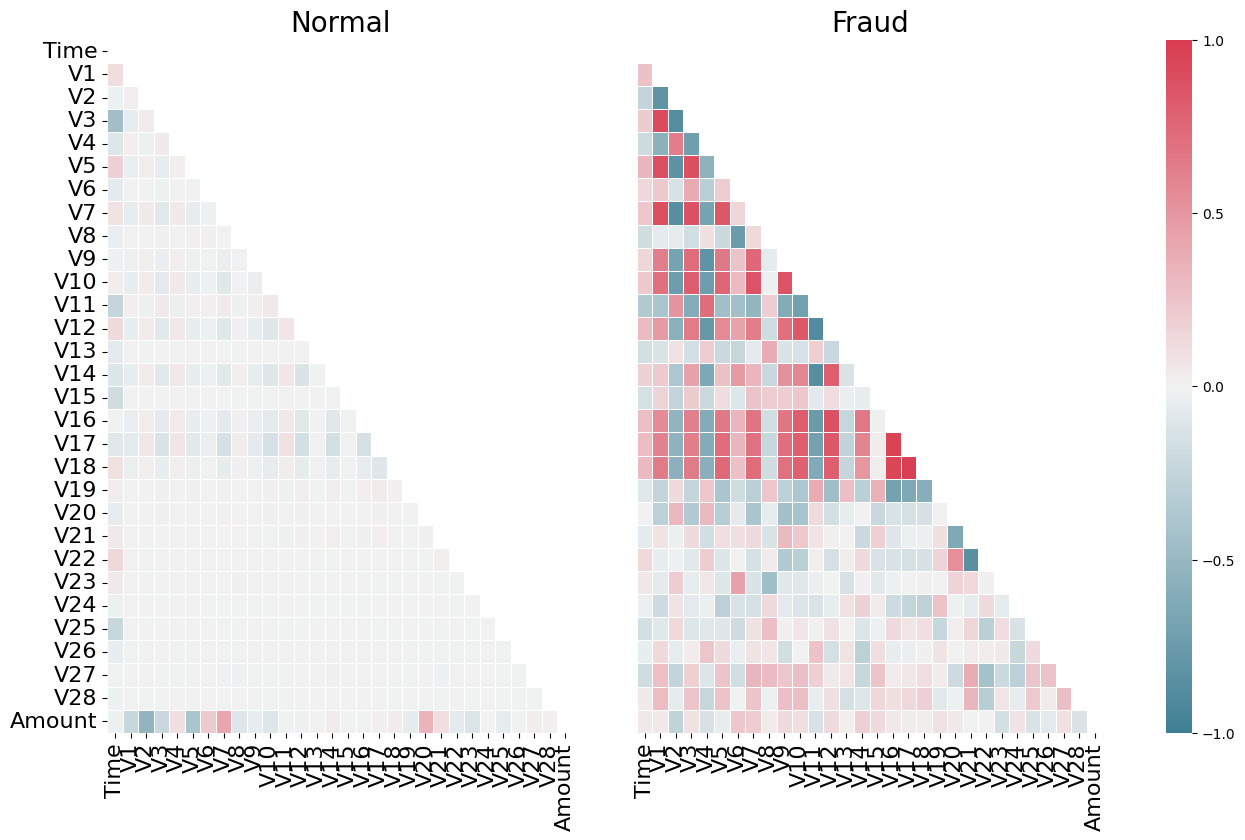

In [19]:
import numpy as np
# 获取数据
fraud = data_df[data_df['Class'] == 1]
nonFraud = data_df[data_df['Class'] == 0]

# 相关性计算
correlationNonFraud = nonFraud.loc[:, data_df.columns != 'Class'].corr()
correlationFraud = fraud.loc[:, data_df.columns != 'Class'].corr()

# 上三角矩阵设置
mask = np.zeros_like(correlationNonFraud)# 全部设置0
indices = np.triu_indices_from(correlationNonFraud)#返回函数的上三角矩阵
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (14, 9))

# 正常用户-特征相关性展示
cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Normal', size = 20)

# 被欺诈的用户-特征相关性展示
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraud', size = 20);


根据上图，V8、V13、V15、V20~V28相对影响较小

c:\Users\PengYu\miniconda3\envs\pytorch\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\PengYu\miniconda3\envs\pytorch\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\PengYu\miniconda3\envs\pytorch\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 27450 (\N{CJK UNIFIED IDEOGRAPH-6B3A}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\PengYu\miniconda3\envs\pytorch\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 35784 (\N{CJK UNIFIED IDEOGRAPH-8BC8}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\PengYu\miniconda3\envs\pytorch\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.p

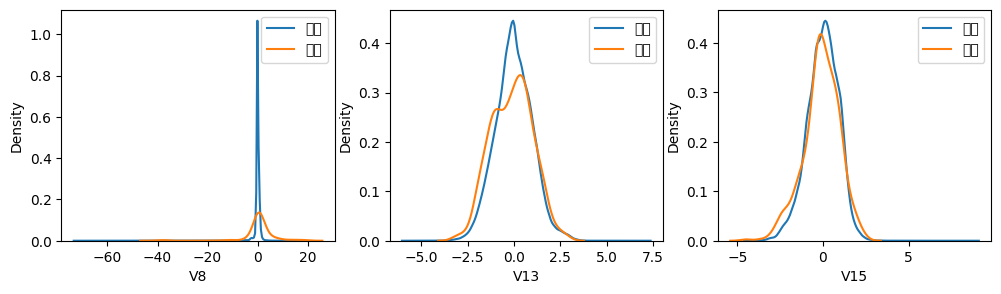

In [ ]:
# 选择3个PCA特征对比分布
plt.figure(figsize=(12,3))
for i, col in enumerate(['V8','V13','V15']):
    plt.subplot(1,3,i+1)
    sns.kdeplot(data_df[data_df['Class']==0][col], label='正常')
    sns.kdeplot(data_df[data_df['Class']==1][col], label='欺诈')
    plt.legend()

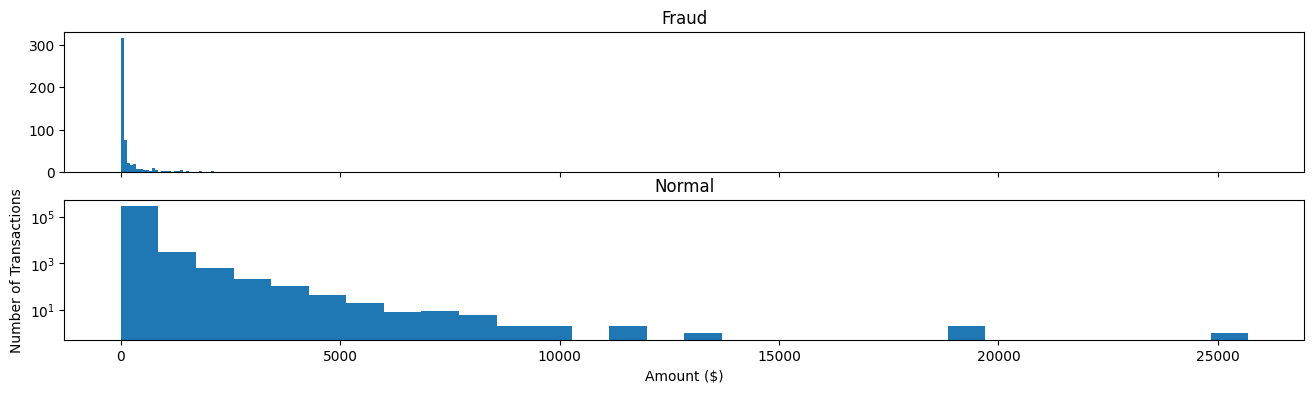

In [20]:
# 是否欺诈与交易金额的关系
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))
bins = 30
ax1.hist(data_df["Amount"][data_df["Class"]== 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data_df["Amount"][data_df["Class"] == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


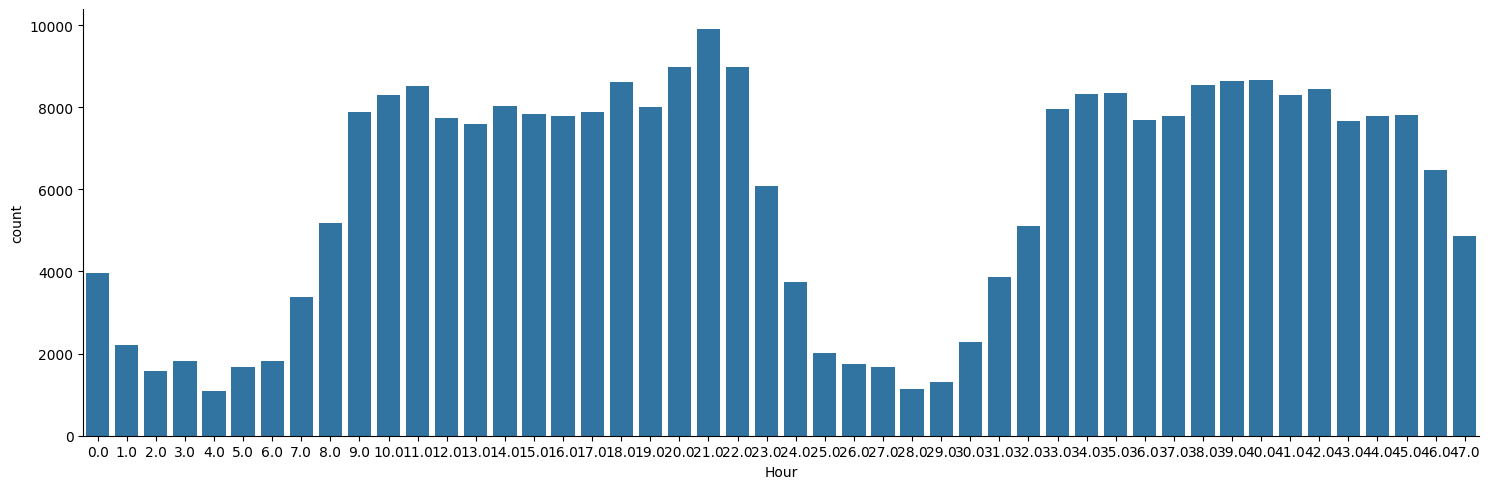

In [25]:
# 消费与时间的关系
# 每个小时交易次数
sns.catplot(x="Hour", data=data_df, kind="count", aspect=3)
